### Загрузка данных

In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import os
import time
import ssl
import urllib.request

from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Отключение проверки SSL-сертификата для загрузки CIFAR-10
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# Преобразование данных
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


### Обучение и тестирование модели. 

In [6]:
# Загрузка предварительно обученной модели ResNet18
model_resnet18 = models.resnet18(pretrained=True)

# Загрузка предварительно обученной модели ResNet34
model_resnet34 = models.resnet34(pretrained=True)

# Загрузка предварительно обученной модели MnasNet 0.5
model_mnasnet0_5 = models.mnasnet0_5(pretrained=True)

# Загрузка предварительно обученной модели MnasNet 1.0
model_mnasnet1_0 = models.mnasnet1_0(pretrained=True)

In [7]:
def train_model(model, trainloader, criterion, optimizer, num_epochs=5):
    """
    Функция для обучения переданной модели.

    - model: Обучаемая модель.
    - trainloader: Загрузчик данных, содержащий обучающий набор.
    - criterion: Функция потерь для вычисления потерь.
    - optimizer: Алгоритм оптимизации для обновления весов модели.
    - num_epochs: Количество эпох обучения.
    """
    # Переводим модель в режим обучения
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Обнуляем градиенты
            optimizer.zero_grad()
            # Прямой проход
            outputs = model(inputs)
            # Вычисление потерь
            loss = criterion(outputs, labels)
            # Обратное распространение
            loss.backward()
            # Шаг оптимизации
            optimizer.step()
            running_loss += loss.item()
        
        # Средние потери для эпохи
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")

In [8]:
def test_model(model, testloader):
    """
    Функция для оценки производительности модели на тестовом наборе.

    - model: Обученная модель.
    - testloader: Загрузчик данных, содержащий тестовый набор.
    """
    # Переводим модель в режим оценки
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            # Получение предсказанных меток
            _, predicted = torch.max(outputs, 1)
            #  Обновление общего количества образцов
            total += labels.size(0)
            # Подсчет количества правильных предсказаний
            correct += (predicted == labels).sum().item()
    
    # Точность на тестовом наборе
    accuracy = 100 * correct / total
    print(f'Accuracy на testset: {accuracy}%')
    
    return accuracy

In [9]:
def train_and_test_model(model, model_name):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    print(f"Training and testing {model_name}:")
    train_model(model, trainloader, criterion, optimizer, num_epochs=5)
    return test_model(model, testloader)

# Обучение и тестирование моделей
accuracy_resnet18 = train_and_test_model(model_resnet18, "ResNet18")
accuracy_resnet34 = train_and_test_model(model_resnet34, "ResNet34")
accuracy_mnasnet0_5 = train_and_test_model(model_mnasnet0_5, "MnasNet 0.5")
accuracy_mnasnet1_0 = train_and_test_model(model_mnasnet1_0, "MnasNet 1.0")

Training and testing ResNet18:
Epoch [1/5], Loss: 1.2744559022929052
Epoch [2/5], Loss: 0.6930753830296305
Epoch [3/5], Loss: 0.540298489848976
Epoch [4/5], Loss: 0.4371457584869221
Epoch [5/5], Loss: 0.35170074198823753
Accuracy на testset: 79.21%
Training and testing ResNet34:
Epoch [1/5], Loss: 1.2184406032647623
Epoch [2/5], Loss: 0.6210962229258264
Epoch [3/5], Loss: 0.4616198279249394
Epoch [4/5], Loss: 0.3524309266977908
Epoch [5/5], Loss: 0.27896592064815406
Accuracy на testset: 81.14%
Training and testing MnasNet 0.5:
Epoch [1/5], Loss: 10.68209184100256
Epoch [2/5], Loss: 5.706657162712663
Epoch [3/5], Loss: 4.463339354376049
Epoch [4/5], Loss: 3.6561268107665468
Epoch [5/5], Loss: 3.1418729718688807
Accuracy на testset: 9.62%
Training and testing MnasNet 1.0:
Epoch [1/5], Loss: 2.823415596466845
Epoch [2/5], Loss: 1.24093738952866
Epoch [3/5], Loss: 1.033964692631646
Epoch [4/5], Loss: 0.9210170217029884
Epoch [5/5], Loss: 0.8500492014086155
Accuracy на testset: 36.12%


### Представление результатов

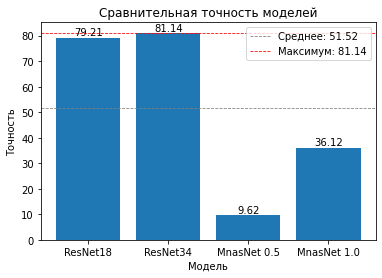

In [11]:
# Модели и точности
models = ['ResNet18', 'ResNet34', 'MnasNet 0.5', 'MnasNet 1.0']
accuracies = [accuracy_resnet18, accuracy_resnet34, accuracy_mnasnet0_5, accuracy_mnasnet1_0]

fig, ax = plt.subplots()
bars = ax.bar(models, accuracies)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Среднее и максимальное значения точности
avg_accuracy = np.mean(accuracies)
max_accuracy = max(accuracies)

# Среднее и максимальное значения точности
ax.axhline(y=avg_accuracy, color='gray', linestyle='--', linewidth=0.8, label=f'Среднее: {round(avg_accuracy, 2)}')
ax.axhline(y=max_accuracy, color='red', linestyle='--', linewidth=0.8, label=f'Максимум: {round(max_accuracy, 2)}')

ax.set_xlabel('Модель')
ax.set_ylabel('Точность')
ax.set_title('Сравнительная точность моделей')

ax.legend(loc='upper right')
plt.show()

В конечном итоге лучшую точность (`81.14%`) показала модель ResNet34 при предварительной обученности.  
В целом, обе модели ResNet показали достойный результат, в отличие от моделей MnasNet.